In [422]:
## 테스트 세트로 모델을 튜닝한다

In [423]:
#1. 로지스틱 회귀로 모델 훈련하고 평가하기

In [424]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [425]:
cancer = load_breast_cancer()

In [426]:
x = cancer.data
y = cancer.target

In [427]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, 
                                                            random_state=42)

In [428]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [429]:
#2. 서포트 백터 머신으로 모델 훈련하고 평가하기

In [430]:
from sklearn.linear_model import SGDClassifier

In [431]:
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

In [432]:
# --> 위처럼 매개변수를 바꿔서 작업해 보는 것을 --> 모델을 튜닝한다라고 한다. 

In [433]:
## 테스트 세트로 모델을 튜닝하면 실전에서 좋은 성능을 기대하기 어렵다

In [434]:
## 검증 세트를 준비한다

In [435]:
#1. 테이터 세트 준비하기

In [436]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                       test_size=0.2, random_state=42)

In [437]:
#2. 검증 세트 분할하기

In [438]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, 
                                                 stratify=y_train_all, test_size=0.2, random_state=42)

In [439]:
#3. 검증 세트 사용해 모델 평가하기

In [440]:
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

In [441]:
## 데이터 전처리와 특성의 스케일을 알아보자

In [442]:
#1. 특성의 스케일은 알고리즘에 영향을 준다.

In [443]:
## 스케일을 조정하지 않고 스케일 비교하기

In [444]:
#1. 훈련 데이터 준비하고 스케일 비교하기

In [445]:
import numpy as np
import matplotlib.pyplot as plt

['mean perimeter' 'mean area']


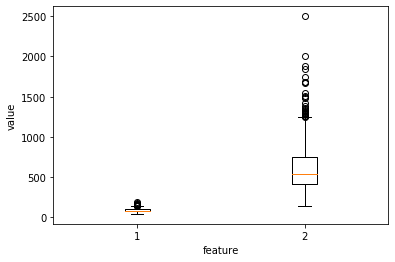

In [446]:
print(cancer.feature_names[[2, 3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [447]:
#2. 가중치를 기록할 변수와 학습률 파라미터 추가하기
#3. 가중치를 기록하고 업데이트 양 조절하기

In [448]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []        # 추가
        self.lr = learning_rate    # 추가
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        for i in range(epochs):
            loss = 0
            # 인덱스를 섞는다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                     # 모든 샘플에 대해 반복한다.
                z = self.forpass(x[i])            # 정방향 계산
                a = self.activation(z)            # 활성화 함수 적용
                err = -(y[i] - a)                 # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)    # 역방향 계산
                self.w -= self.lr * w_grad        # 가중치 업데이트(학습률 적용) 
                self.b -= b_grad                  # 절편 업데이트
                # 가중치를 기록한다
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적한다.
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i]*np.log(1-a)))
            # 에포크마다 평균 손실을 저장한다
            self.losses.append(loss/len(y))
        
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]        
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [449]:
#4. 모델 훈련하고 평가하기

In [450]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

In [451]:
#5. layer1 객체의 인스턴스 변수 w_history에는 100번의 에포크 동안 변경된 가중치가 모두 기록되어 있다. 

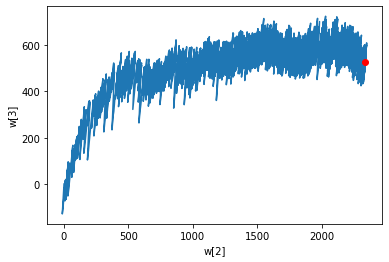

In [452]:
w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [453]:
## 스케일을 조정해서 모델을 훈련하다

In [454]:
#1. 넘파이로 표준화 구현하기

In [455]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [456]:
#2. 모델 훈련하기

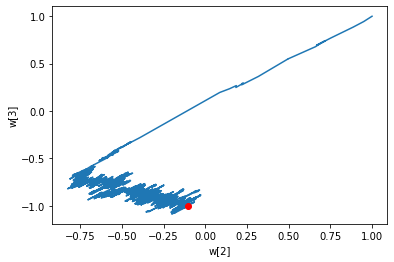

In [458]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [459]:
#3. 모델 성능 평가하기

In [460]:
layer2.score(x_val, y_val)

0.37362637362637363

In [461]:
#4. 성능이 매우 좋지 않다. <-- 위를 보니까

In [462]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

In [463]:
## 스케일을 조정한 다음에 실수하기 쉬운 함정을 알아보자

In [464]:
#1. 원본 훈련 세트와 검증 세트로 산점도 그리기

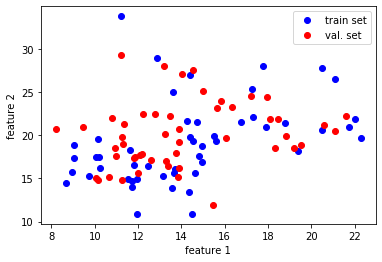

In [465]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [466]:
#2. 전처리한 훈련 세트와 검증 세트로 산점도 그리기

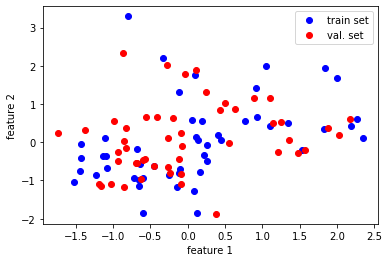

In [467]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [468]:
#3. 올바르게 검증 세트 전처리하기

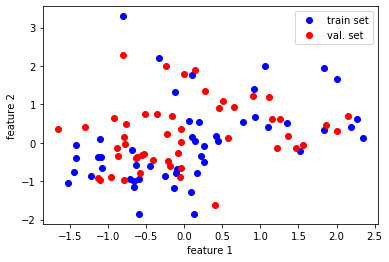

In [470]:
x_val_scaled = (x_val - train_mean) / train_std    # x_val_scaled = (x_val - val_mean) / val_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [471]:
#4. 모델 평가하기

In [472]:
layer2.score(x_val_scaled, y_val)

0.967032967032967